# Data Analysis

70  


In [64]:
import os
import numpy as np
import pandas as pd

from fitparse import FitFile
import gpxpy
import gpxpy.gpx

import matplotlib.pyplot as plt
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import gmplot

## Load Data

### Application

In [65]:
data_path = "../data/android_app/"
date = "2023_04_14"
rec = 51

# Acceleration data
acc_data = pd.read_csv(os.path.join(data_path, date, "DATA" + str(rec) + ".txt"), sep=";", header=1, names=["ay", "ax", "az"])

# acc_data = pd.read_csv(os.path.join(data_path, date, "DATA" + str(rec) + ".txt"), sep=";", header=1, names=["t", "ax", "ay", "az", "loc"])

## Acceleration Data

In [66]:
acc_data

,ay,ax,az
0,0.248997,0.038307,9.777920
1,0.248997,0.038307,9.691729
2,0.153229,0.047884,9.950302
3,0.162806,-0.009577,10.093954
4,0.191536,-0.038307,9.959879
...,...,...,...
2155,0.258574,0.038307,9.959879
2156,0.105345,-0.076614,9.959879
2157,0.229843,-0.047884,10.141838
2158,0.201113,-0.067038,9.969456


In [67]:
acc_data.describe()

,ay,ax,az
count,2160.000000,2160.000000,2160.000000
mean,0.137853,-0.015425,9.940810
std,2.119401,1.084029,2.204302
min,-13.110648,-6.368576,-6.263232
25%,-0.287304,-0.450110,9.528923
50%,0.172383,0.000000,9.902418
75%,0.574608,0.335188,10.345346
max,13.551182,5.410896,24.545357


In [68]:
# acc_data.hist(column="ax")

In [69]:
acc_data.isna().sum()

ay    0
ax    0
az    0
dtype: int64

Text(0.5, 1.0, 'Acceleration Z')

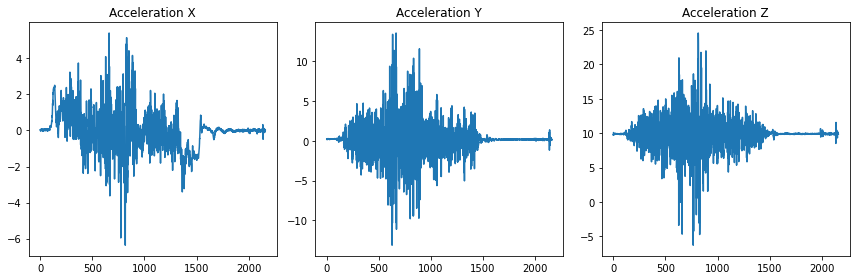

In [70]:
nb_measure = acc_data.shape[0]

fig, axs = plt.subplots(1,3)
fig.set_tight_layout(True)
fig.set_size_inches(12, 4)
axs[0].plot(range(nb_measure), acc_data["ax"])
axs[0].set_title("Acceleration X")
axs[1].plot(range(nb_measure), acc_data["ay"])
axs[1].set_title("Acceleration Y")
axs[2].plot(range(nb_measure), acc_data["az"])
axs[2].set_title("Acceleration Z")

In [71]:
def single_graph(df):
    fig = go.Figure()
    for col in df.columns:
      fig.add_trace(go.Scatter(x=df.index,y=df[col],name=col))
    return fig

def triple_graph(df):
    col_num = 1
    fig = make_subplots(rows=1, cols=3)
    for col in df.columns:
      fig.add_trace(go.Scatter(x=df.index,y=df[col],name=col), row=1, col=col_num)
      col_num += 1
    fig.update_layout(height=1080/2, width=1920/2, title_text="Test")
    return fig

In [72]:
# fig = single_graph(acc_data[["ax", "ay", "az", "norm"]])
fig = single_graph(acc_data[["ax", "ay", "az"]])
fig.write_html("data_analysis_acc_1.html", full_html=False, include_plotlyjs="cdn")
fig.show()

In [73]:
fig = triple_graph(acc_data[["ax", "ay", "az"]])
fig.write_html("data_analysis_acc_2.html", full_html=False, include_plotlyjs="cdn")
fig.show()

![](https://fr.mathworks.com/help/supportpkg/android/ref/simulinkandroidsupportpackage_galaxys4_accelerometer.png)

## GPS Data

In [74]:
gps_data

NameError: name 'gps_data' is not defined

In [ ]:
units # Check if data has been converted when loading

{'alt': '?', 'lat': 'deg', 'long': 'deg'}

In [ ]:
gps_data.describe()

,lat,long
count,127.000000,127.000000
mean,48.403793,7.446247
std,0.003757,0.003521
min,48.397830,7.438549
25%,48.400252,7.444659
50%,48.404109,7.447500
75%,48.407728,7.448993
max,48.408625,7.450468


array([[<AxesSubplot:title={'center':'time'}>,
        <AxesSubplot:title={'center':'lat'}>],
       [<AxesSubplot:title={'center':'long'}>, <AxesSubplot:>]],
      dtype=object)

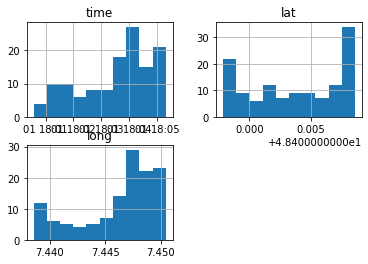

In [ ]:
gps_data.hist()

In [ ]:
gps_data.isna().sum()

time      0
lat       0
long      0
alt     127
dtype: int64

In [ ]:
min_lat, max_lat = min(gps_data["lat"]), max(gps_data["lat"])
min_lon, max_lon = min(gps_data["long"]), max(gps_data["long"])
mymap = gmplot.GoogleMapPlotter(min_lat + (max_lat - min_lat) / 2,
                                min_lon + (max_lon - min_lon) / 2,
                                12)
mymap.plot(gps_data["lat"], gps_data["long"], "red", edge_width=2)
mymap.draw("data_analysis_gps.html")

In [ ]:
import webbrowser
webbrowser.open("data_analysis_gps.html")

True

## Tests

![](https://fr.mathworks.com/help/supportpkg/android/ref/simulinkandroidsupportpackage_galaxys4_accelerometer.png)

In [75]:
data_path = "../data/android_app/test"
rec = "X"

# Acceleration data
acc_data = pd.read_csv(os.path.join(data_path, "DATA" + str(rec) + ".txt"), sep=";", header=1, names=["t", "ax", "ay", "az", "loc"])

In [76]:
fig = triple_graph(acc_data[["ax", "ay", "az"]])
fig.write_html("data_analysis_acc_2.html", full_html=False, include_plotlyjs="cdn")
fig.show()